# Eight Queens Genetic Algorithim

a) generate population

In [1]:
from BasicGaAlgorithim import generate_population

generate_population(3, 3)

[[1, 0, 2], [2, 1, 0], [1, 2, 1]]

b) fitness function

In [2]:
from BasicGaAlgorithim import fitness_function

assert fitness_function([7,1,4,2,0,6,3,5]) == 28
assert fitness_function([7,2,4,2,0,6,3,2]) == 23
assert fitness_function([1,1,1,1,0,6,3,2]) == 19
assert fitness_function([1,1,1,1,1,1,1,1]) == 0
assert fitness_function([1,2,3,4,5,6,7,8]) == 0

c)	selection:

In [3]:
from BasicGaAlgorithim import selection


population = generate_population(3, 5)
fitness_scores = [fitness_function(genotype) for genotype in population]
print("initial populations:")
print(population)
print("fitness scores:")
print(fitness_scores)
print("selected parents")
selection(population, fitness_scores, 3)


initial populations:
[[1, 2, 0], [2, 2, 0], [0, 1, 1], [1, 1, 0], [2, 0, 0]]
fitness scores:
[2.0, 1.0, 1.0, 1.0, 1.0]
selected parents


[([2, 0, 0], [1, 2, 0]), ([2, 0, 0], [2, 2, 0]), ([2, 0, 0], [2, 2, 0])]

d)	Crossover

In [4]:
from BasicGaAlgorithim import crossover


population = generate_population(3, 3)
fitness_scores = [fitness_function(genotype) for genotype in population]
selected_parents = selection(population, fitness_scores, 3)

print("selected parents")
print(selected_parents)
print("offspring")

crossover(selected_parents, 3)

selected parents
[([2, 0, 2], [1, 0, 2]), ([1, 0, 2], [2, 0, 2]), ([1, 0, 2], [2, 0, 2])]
offspring


[[1, 0, 2], [2, 0, 2], [1, 0, 2]]

e)  mutation

In [5]:
from BasicGaAlgorithim import mutation


population = generate_population(3, 3)
fitness_scores = [fitness_function(genotype) for genotype in population]
selected_parents = selection(population, fitness_scores, 3)
offspring = crossover(selected_parents, 3)
print("offspring")
print(offspring)
print("mutated")

mutation(population, 2, 3)

offspring
[[2, 2, 1], [2, 2, 0], [2, 2, 0]]
mutated


[[1, 1, 1], [1, 0, 0], [2, 0, 0]]

check for completion and calclate perfect score

In [6]:
from BasicGaAlgorithim import check_for_perfect_genotype, calculate_perfect_score

# print(check_for_perfect_genotype([7,1,4,2,0,6,3,5]))
print(calculate_perfect_score(8))

28.0


generation

In [7]:
def generation(population, size_of_population, number_of_queens, mutation_frequency):
    # b) fitness function
    fit_scores = [fitness_function(genotype) for genotype in population]

    # c) selection
    selected_pairs = selection(population, fit_scores, size_of_population)
    
    # d) cross over
    children = crossover(selected_pairs, number_of_queens)

    # e) mutation
    mutated = mutation(children, mutation_frequency, number_of_queens)

    return mutated, fit_scores

# a) Initial Population
population = generate_population(3, 3)
generation(population, 3, 3, 2)


([[1, 1, 2], [1, 1, 2], [0, 1, 2]], [2.0, 0.0, 0.0])

Full algorithim

In [12]:
import timeit

NUMBER_OF_QUEENS=8
SIZE_OF_POPULATION=25
MUTATION_FREQUENCY = 8
# TODO HOW IS THIS CALCULATED
PERFECT_SCORE = calculate_perfect_score(NUMBER_OF_QUEENS)


def genetic_algorithm(population):

    start_time = timeit.default_timer()

    gen = 0
    completed_genotype = []

    # # g) check if it has found correct state and exit loop
    while not completed_genotype:
        population, fitness_scores = generation(population, SIZE_OF_POPULATION, NUMBER_OF_QUEENS, MUTATION_FREQUENCY)
        completed_genotype = check_for_perfect_genotype(population, fitness_scores, PERFECT_SCORE)
        gen += 1

        if gen == 100000:
            break

    stop_time = timeit.default_timer()

    return {
        "elapsed_time": stop_time - start_time,
        "number_of_generations": gen,
        "completed_state": completed_genotype
    }

# a) generate initial population
population = generate_population(NUMBER_OF_QUEENS, SIZE_OF_POPULATION)

ga_result = genetic_algorithm(population)

ga_result

elapsed_time: 15.018719599999997
number_of_generations: 8558
completed_state: [3, 1, 4, 7, 0, 0, 4, 7]


{'elapsed_time': 15.018719599999997,
 'number_of_generations': 8558,
 'completed_state': [3, 1, 4, 7, 0, 0, 4, 7]}

In [13]:
# # generate test population
# # only need to do this once

# import pickle

test_populations_name = 'test_populations_25'

# # generate test populations

# test_population = []

# for i in range(100):
#         test_population.append( generate_population(NUMBER_OF_QUEENS, SIZE_OF_POPULATION))

# with open(test_populations_name, 'wb') as f:
#         pickle.dump(test_population, f)

In [14]:
# run algo on all test populations

import pickle

with open(test_populations_name, 'rb') as f:
    test_population = pickle.load(f)

results = {
        "elapsed_time": [],
        "number_of_generations": [],
        "completed_state": []
}

for pop in test_population:

        ga_result = genetic_algorithm(population)

        results["elapsed_time"].append(ga_result["elapsed_time"])
        results["number_of_generations"].append(ga_result["number_of_generations"])
        results["completed_state"].append(ga_result["completed_state"])

        print(f"elapsed_time:")
        print(ga_result["elapsed_time"])
        print(f"number_of_generations:")
        print(ga_result["number_of_generations"])
        print(f"completed_state:")
        print(ga_result["completed_state"])
        print("=========================")

results

elapsed_time: 20.357952899999987
number_of_generations: 11392
completed_state: [4, 7, 3, 6, 6, 4, 0, 6]
elapsed_time:
20.357952899999987
number_of_generations:
11392
completed_state:
[4, 7, 3, 6, 6, 4, 0, 6]
elapsed_time: 4.7260661000000255
number_of_generations: 2694
completed_state: [0, 4, 5, 2, 1, 7, 2, 1]
elapsed_time:
4.7260661000000255
number_of_generations:
2694
completed_state:
[0, 4, 5, 2, 1, 7, 2, 1]
elapsed_time: 5.930042299999968
number_of_generations: 3196
completed_state: [1, 2, 3, 5, 4, 1, 1, 3]
elapsed_time:
5.930042299999968
number_of_generations:
3196
completed_state:
[1, 2, 3, 5, 4, 1, 1, 3]
elapsed_time: 14.356194800000026
number_of_generations: 9952
completed_state: [0, 0, 6, 1, 6, 7, 3, 7]
elapsed_time:
14.356194800000026
number_of_generations:
9952
completed_state:
[0, 0, 6, 1, 6, 7, 3, 7]
elapsed_time: 0.2762531000000763
number_of_generations: 171
completed_state: [4, 7, 1, 3, 7, 4, 1, 2]
elapsed_time:
0.2762531000000763
number_of_generations:
171
completed_stat

{'elapsed_time': [20.357952899999987,
  4.7260661000000255,
  5.930042299999968,
  14.356194800000026,
  0.2762531000000763,
  1.1947043999999778,
  6.073428199999967,
  24.951219599999945,
  3.4338308000000097,
  2.2397810999999592,
  1.8125774000000092,
  0.29868229999999585,
  1.3012358999999378,
  5.866899999999987,
  6.2188260000000355,
  5.042205699999954,
  10.238087500000006,
  5.400100199999997,
  1.291091100000017,
  5.0407685999999785,
  0.7242198000000144,
  3.861040799999955,
  10.542987299999936,
  4.632131800000025,
  3.8785469000000603,
  8.255566899999963,
  1.334989299999961,
  8.362756800000057,
  3.7142797999999857,
  24.76824769999996,
  8.72191620000001,
  3.2919032000000925,
  9.823098699999946,
  0.5353814000000057,
  3.293278600000008,
  1.0976585000000796,
  1.1422761999999693,
  2.689749200000051,
  6.666297399999962,
  2.4474574000000757,
  9.513603900000021,
  3.6794696000000613,
  4.600579599999946,
  15.879074899999978,
  4.408765100000096,
  2.7647436000

    elapsed_time  number_of_generations           completed_state
0      20.357953                  11392  [4, 7, 3, 6, 6, 4, 0, 6]
1       4.726066                   2694  [0, 4, 5, 2, 1, 7, 2, 1]
2       5.930042                   3196  [1, 2, 3, 5, 4, 1, 1, 3]
3      14.356195                   9952  [0, 0, 6, 1, 6, 7, 3, 7]
4       0.276253                    171  [4, 7, 1, 3, 7, 4, 1, 2]
..           ...                    ...                       ...
95      9.436831                   6299  [4, 7, 4, 2, 5, 4, 0, 6]
96      0.952291                    728  [5, 2, 4, 0, 5, 4, 0, 7]
97      5.418995                   3861  [0, 4, 3, 7, 6, 1, 5, 7]
98      6.993129                   5092  [7, 3, 0, 7, 5, 1, 3, 0]
99      7.190607                   5095  [4, 6, 3, 7, 3, 4, 6, 4]

[100 rows x 3 columns]
mean_number_of_generations: 5130.32
std_number_of_generations: 4776.559562080327
mean_elapsed_time: 7.778844181000011
std_elapsed_time: 7.499804483369697
over_30_seconds
    elapsed_ti

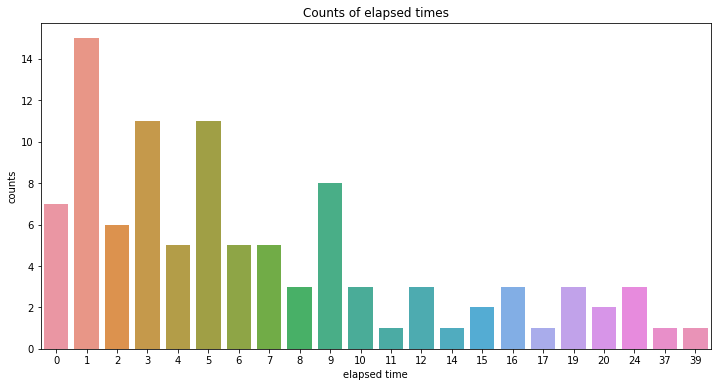

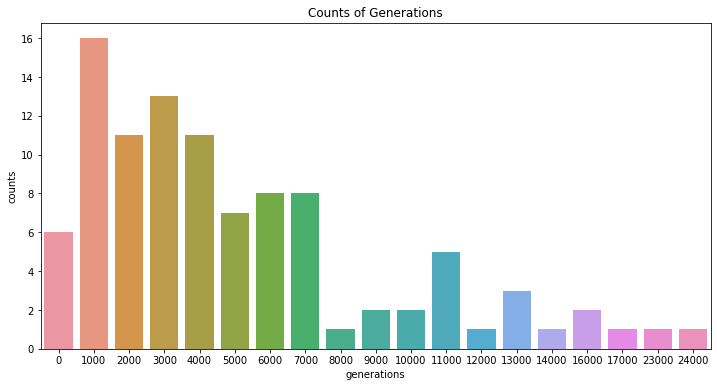

In [17]:
import os

unique_identifier = "100_results_no_reset_population"
parent_directory = "C:\\Users\\SAB68\\repos\\samsambutdifferent\\eight-queen-problem\\results\\"

path = os.path.join(parent_directory, unique_identifier)

if not os.path.exists(path):
    os.mkdir(path)

config = {
    "NUMBER_OF_QUEENS": NUMBER_OF_QUEENS,
    "SIZE_OF_POPULATION": SIZE_OF_POPULATION,
    "MUTATION_FREQUENCY": MUTATION_FREQUENCY,
    "PERFECT_SCORE": PERFECT_SCORE,
    "test_file": test_populations_name
}

f = open(path + "\\config", "w")

for item in config.items():
    f.writelines(str(item) + '\n')
f.close()


import pandas as pd

results_df = pd.DataFrame(results)

mean_number_of_generations = results_df["number_of_generations"].mean()
mean_elapsed_time = results_df["elapsed_time"].mean()

std_number_of_generations = results_df["number_of_generations"].std()
std_elapsed_time = results_df["elapsed_time"].std()

print(results_df)

print(f"mean_number_of_generations: {mean_number_of_generations}")
print(f"std_number_of_generations: {std_number_of_generations}")
print(f"mean_elapsed_time: {mean_elapsed_time}")
print(f"std_elapsed_time: {std_elapsed_time}")


f = open(path + "\\metrics", "w")
f.writelines(f"mean_number_of_generations: {mean_number_of_generations}" + '\n')
f.writelines(f"std_number_of_generations: {std_number_of_generations}" + '\n')
f.writelines(f"mean_elapsed_time: {mean_elapsed_time}" + '\n')
f.writelines(f"std_elapsed_time: {std_elapsed_time}" + '\n')
f.writelines('\n')
f.write(str(results_df))
f.close()


# check all results finish
over_30_seconds = results_df[results_df["elapsed_time"] > 30]
f = open(path + "\\over_30_seconds", "w")
f.write(str(over_30_seconds))
f.close()
print("over_30_seconds")
print(over_30_seconds)


import math

def round_down_to_1000(x):
    return round(x, -3) 


floored_elapsed_time = results_df["elapsed_time"].apply(math.floor)
floored_number_of_generations = results_df["number_of_generations"].apply(round_down_to_1000)

frame = { 'elapsed_time': floored_elapsed_time, 'number_of_generations': floored_number_of_generations }

floored_results_df = pd.DataFrame(frame)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

fig = sns.barplot(x=floored_results_df.elapsed_time.value_counts().index, y=floored_results_df.elapsed_time.value_counts())

plt.xlabel("elapsed time")
plt.ylabel("counts")
plt.title("Counts of elapsed times")
plt.savefig(path + '/counts_of_elapsed_time.png')
plt.show(fig)

plt.figure(figsize=(12,6))

fig = sns.barplot(x=floored_results_df.number_of_generations.value_counts().index, y=floored_results_df.number_of_generations.value_counts())

plt.xlabel("generations")
plt.ylabel("counts")
plt.title("Counts of Generations")
plt.savefig(path + '/counts_of_generations.png')
plt.show(fig)
